<a href="https://colab.research.google.com/github/MinsooKwak/Study/blob/main/DataManipulate/TED_talk_%ED%95%9C%EA%B5%AD%EC%96%B4_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터셋

[TED Talk Dataset Link](https://www.kaggle.com/datasets/miguelcorraljr/ted-ultimate-dataset/data)

- kaggle, 2020년 데이터셋
- 여러 언어 중 한국어 데이터셋 활용

## 1) 데이터셋 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


라이브러리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/TED_dataset_2020/2020-05-01/ted_talks_ko.csv')

In [4]:
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,"앨 고어, 기후 변화 위기를 막으려면",Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523396,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,"영화 에서 보여준 유머와 인류애로, 하이브리드 자동차를 구입하는 것부터 지구 온난화...","감사합니다, 크리스. 이곳에 두 번이나 설 기회를 얻게된 것을 큰 영광으로 생각합니..."
1,7,"데이빗 포그의 ""단순함이 통한다""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920845,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,뉴욕타임즈의 칼럼 기고가인 데이빗 포그가 '최악의 인터페이스 디자인'에 대해 힐난하...,"♫안녕 자동응답기, 나의 오랜 친구여 (웃음) 기술 지원이 필요해서 또 전화했어. ..."
2,53,마조라 카터의 도시 재개발 이야기,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664083,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,맥아더상 수상자인 행동주의자 마조라 카터가 사우스 브롱스에서 정의를 지켜나가는 싸움...,여러분이 오늘 여기 계신다는 것은 -여러분이 여기 계셔서 참 행복해요- 환경친화적인...


## 2) EDA

### 1> Preview

In [5]:
print(f'총 {df.shape[0]}개의 데이터셋')
print(f'총 {df.shape[1]}개의 초기 feature 존재')

총 3758개의 데이터셋
총 19개의 초기 feature 존재


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,3758.0,1.036128e+04,1.528669e+04,1.0,1191.25,2208.5,18513.50,62707.0
views,3758.0,2.224453e+06,3.487978e+06,10004.0,941642.00,1425836.5,2194838.25,65052032.0
comments,3255.0,1.657791e+02,2.716968e+02,1.0,41.00,92.0,191.00,6449.0
duration,3758.0,7.255538e+02,3.450650e+02,60.0,402.00,742.0,982.75,3608.0


In [7]:
print(df['description'][0])
print(df['description'][1])

영화 에서 보여준 유머와 인류애로, 하이브리드 자동차를 구입하는 것부터 지구 온난화의 새로운 브랜드 네임을 만드는 것에 이르기까지, 개개인이 바로 지구 온난화에 대응할 수 있는 15가지 방법을 앨 고어가 제시한다.
뉴욕타임즈의 칼럼 기고가인 데이빗 포그가 '최악의 인터페이스 디자인'에 대해 힐난하고, 잘 디자인 된 제품들에 대해 보여줍니다. 감정을 노래로 분출하는 재미있는 영상입니다.


- transcript에 대한 설명이 작성되어있는 것으로 확인

In [8]:
df.topics.describe()

count                   3758
unique                  3733
top       ['TED-Ed', 'math']
freq                       8
Name: topics, dtype: object

### 2> 전처리

In [9]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 50.5 MB/s eta 0:00:00


In [10]:
import re
import konlpy
from tqdm import tqdm
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec

In [11]:
okt = Okt()

In [12]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [13]:
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,"앨 고어, 기후 변화 위기를 막으려면",Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523396,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,"영화 에서 보여준 유머와 인류애로, 하이브리드 자동차를 구입하는 것부터 지구 온난화...","감사합니다, 크리스. 이곳에 두 번이나 설 기회를 얻게된 것을 큰 영광으로 생각합니..."
1,7,"데이빗 포그의 ""단순함이 통한다""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920845,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,뉴욕타임즈의 칼럼 기고가인 데이빗 포그가 '최악의 인터페이스 디자인'에 대해 힐난하...,"♫안녕 자동응답기, 나의 오랜 친구여 (웃음) 기술 지원이 필요해서 또 전화했어. ..."


In [14]:
df.transcript = df.transcript.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df = df.dropna(how='any')

<ipython-input-14-0e087db841cf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.transcript = df.transcript.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [15]:
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,"앨 고어, 기후 변화 위기를 막으려면",Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523396,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,"영화 에서 보여준 유머와 인류애로, 하이브리드 자동차를 구입하는 것부터 지구 온난화...",감사합니다 크리스 이곳에 두 번이나 설 기회를 얻게된 것을 큰 영광으로 생각합니다 ...
1,7,"데이빗 포그의 ""단순함이 통한다""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920845,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,뉴욕타임즈의 칼럼 기고가인 데이빗 포그가 '최악의 인터페이스 디자인'에 대해 힐난하...,안녕 자동응답기 나의 오랜 친구여 웃음 기술 지원이 필요해서 또 전화했어 보스의 경...


In [16]:
df2 = pd.DataFrame(df['event'].value_counts())
df2 = df2.reset_index()
df2

,index,event
0,TED2018,95
1,TED2017,93
2,TED2014,83
3,TED2009,80
4,TED2019,79
...,...,...
413,TEDxAmazonia,1
414,TEDxPennQuarter,1
415,TEDxNorrkoping,1
416,TED@State Street London,1


In [17]:
df3 = df2[df2['index'].str.contains('TED20')]
df3.T

,0,1,2,3,4,5,6,7,9,10,11,14,16,20,23,25,29,34,147
index,TED2018,TED2017,TED2014,TED2009,TED2019,TED2016,TED2015,TED2013,TED2011,TED2007,TED2010,TED2012,TED2008,TED2006,TED2005,TED2003,TED2004,TED2002,TED2001
event,95,93,83,80,79,75,75,73,69,68,68,64,56,42,36,34,31,27,4


In [18]:
df3['index'].unique()

array(['TED2018', 'TED2017', 'TED2014', 'TED2009', 'TED2019', 'TED2016',
       'TED2015', 'TED2013', 'TED2011', 'TED2007', 'TED2010', 'TED2012',
       'TED2008', 'TED2006', 'TED2005', 'TED2003', 'TED2004', 'TED2002',
       'TED2001'], dtype=object)

- 토큰화를 수행 시도했으나 메모리 부족으로 오류 발생
- 데이터를 줄이기 위해 TED 2019, TED 2018, TED 2017의 데이터만 활용하겠다

In [19]:
df4 = df[(df['event'].str.contains('TED2019'))|(df['event'].str.contains('TED2018'))|(df['event'].str.contains('TED2017'))]
print(f'{df4.shape[0]}개의 데이터')
df4.head(1)

267개의 데이터


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2376,2744,모두가 함께 만드는 미래만이 가치있는 이유,His Holiness Pope Francis,{0: 'His Holiness Pope Francis'},{0: ['bishop of rome']},{0: 'Pope Francis is the Bishop of Rome and th...,3465806,2017-04-25,2017-04-26,TED2017,it,"['ar', 'be', 'bg', 'de', 'el', 'en', 'es', 'fa...",284.0,1072,"['children', 'climate change', 'Christianity',...","{2110: ""Let's help refugees thrive, not just s...",https://www.ted.com/talks/his_holiness_pope_fr...,"단 한 사람만 있어도 희망은 있으며, 그 사람은 당신일 수 있다는 가슴을 파고드는 ...",프란치스코 교황 성하 바티칸 시 영상 최초 공개 좋은 저녁 아니면 좋은 아침입니다...


In [20]:
from collections import Counter

In [21]:
#konlpy.jvm.init_jvm(jvmpath=None, max_heap_size=1024)

In [22]:
words = " ".join(df4['transcript'].tolist())
len(words)

1246053

In [23]:
morphs = okt.morphs(words, stem = True)
frequent = Counter(morphs).most_common()

print(f'형태소 개수는 {len(morphs)}개')
print(f'형태소 빈도는 {len(frequent)}')

형태소 개수는 486649개
형태소 빈도는 16076


In [24]:
df_freq = pd.DataFrame(frequent)
df_freq.columns = ['morph','freq']

In [25]:
df_freq = df_freq[(df_freq['freq' ]>=5)]

df_freq.to_excel('/content/drive/MyDrive/DataSet/stopword.xlsx')
df_freq

,morph,freq
0,하다,21099
1,을,16346
2,이,16338
3,의,10610
4,있다,9814
...,...,...
5993,게스트,5
5994,불임,5
5995,마빈,5
5996,마키아벨리,5


In [26]:
# 전처리 추가 진행해야

In [27]:
stopwords = ['하다','을','이','의','있다','에','를','들','는','가','은','것','그','수','에서','으로',
             '저','적','제','로','도','과','않다','죠','요','그리고','보다','한','와','인','없다',
             '아니다','더','하고','때','에게','하지만','되어다','게','고','거','다','걸','서','처럼',
             '라고','두','안','이나','이고','예요','예','면','하','해','좀','뿐','날','데','음','엔',
             '로부터','구','마치','그러면','기','잘','이란','온','째','함','께','몇몇','에게는','그저',
             '력','니','뿐이다','즉','으로써','야','여','채','치','막','계','곧','거야','어쩌면','장',
             '꼭','임','용','경','리','바','체','트','스','존','극','때로는','역','님','준','듯','군',
             '쇼','정','재','권','애','율','딱','히','젠','접','영','냐','글쎄요','즈','듯이','유','친',
             '한편','퍼','우무','려고','여서','한데','빨르다','넌','잡','폴','우','하라','논','마','래',
             '이신','낫','짓','로써','시마','조물','에게만','근','놈','울','지면','노','야기','혹','머',
             '제임스','엇','건대','한때','변','엠','담','이로','애초','웰','널','누','번은','브','케','에릭',
             '티스','아예','드','린','그런','글쎄','엉','끼','이요','메','응','버','디','뻔','션','이바','에리',
             '휴','아스','롭','라고는','윌','에스','하하','앨리스','사피','으','으로부터의','보단','에다',
             '그란','어스','분','성','점','번','지','후','하']

In [28]:
tokenized_data = []

for sen in tqdm(df['transcript']):
  tokenized_sen = okt.morphs(sen, stem=True)

  refined_sen = [w for w in tokenized_sen if w not in stopwords and len(w)>1 and not w.isdigit()]

  tokenized_data.append(refined_sen)

100%|██████████| 3243/3243 [16:49<00:00,  3.21it/s]


In [29]:
model = Word2Vec(sentences=tokenized_data,
                 vector_size=100,
                 window=5,
                 min_count=5,
                 sg=0,
                 workers=4)

In [30]:
model.wv.vectors.shape

(20985, 100)

In [31]:
model.wv.most_similar('환경')

[('적응하다', 0.6612165570259094),
 ('생태계', 0.6424614191055298),
 ('극한', 0.5791204571723938),
 ('자연환경', 0.5593886971473694),
 ('공동체', 0.558302640914917),
 ('자원', 0.542905330657959),
 ('자연', 0.5353842973709106),
 ('안정', 0.5351480841636658),
 ('건강', 0.5337802171707153),
 ('체계', 0.5319797396659851)]

In [35]:
model.wv.save_word2vec_format('ted_talk_2020_kr')

### 시각화

https://projector.tensorflow.org/

In [36]:
!python -m gensim.scripts.word2vec2tensor --input ted_talk_2020_kr --output ted_talk_2020_kr

2023-11-24 13:56:47,599 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py --input ted_talk_2020_kr --output ted_talk_2020_kr
2023-11-24 13:56:47,599 - keyedvectors - INFO - loading projection weights from ted_talk_2020_kr
2023-11-24 13:56:49,830 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (20985, 100) matrix of type float32 from ted_talk_2020_kr', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-11-24T13:56:49.828973', 'gensim': '4.3.2', 'python': '3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]', 'platform': 'Linux-5.15.120+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2023-11-24 13:56:51,192 - word2vec2tensor - INFO - 2D tensor file saved to ted_talk_2020_kr_tensor.tsv
2023-11-24 13:56:51,192 - word2vec2tensor - INFO - Tensor metadata file saved to ted_talk_2020_kr_metadata.tsv
2023-11-24 13:56:51,193 - word2vec2tensor - INFO - finished running word2vec2tensor.py


**시각화**

- word2vec 시각화 예시

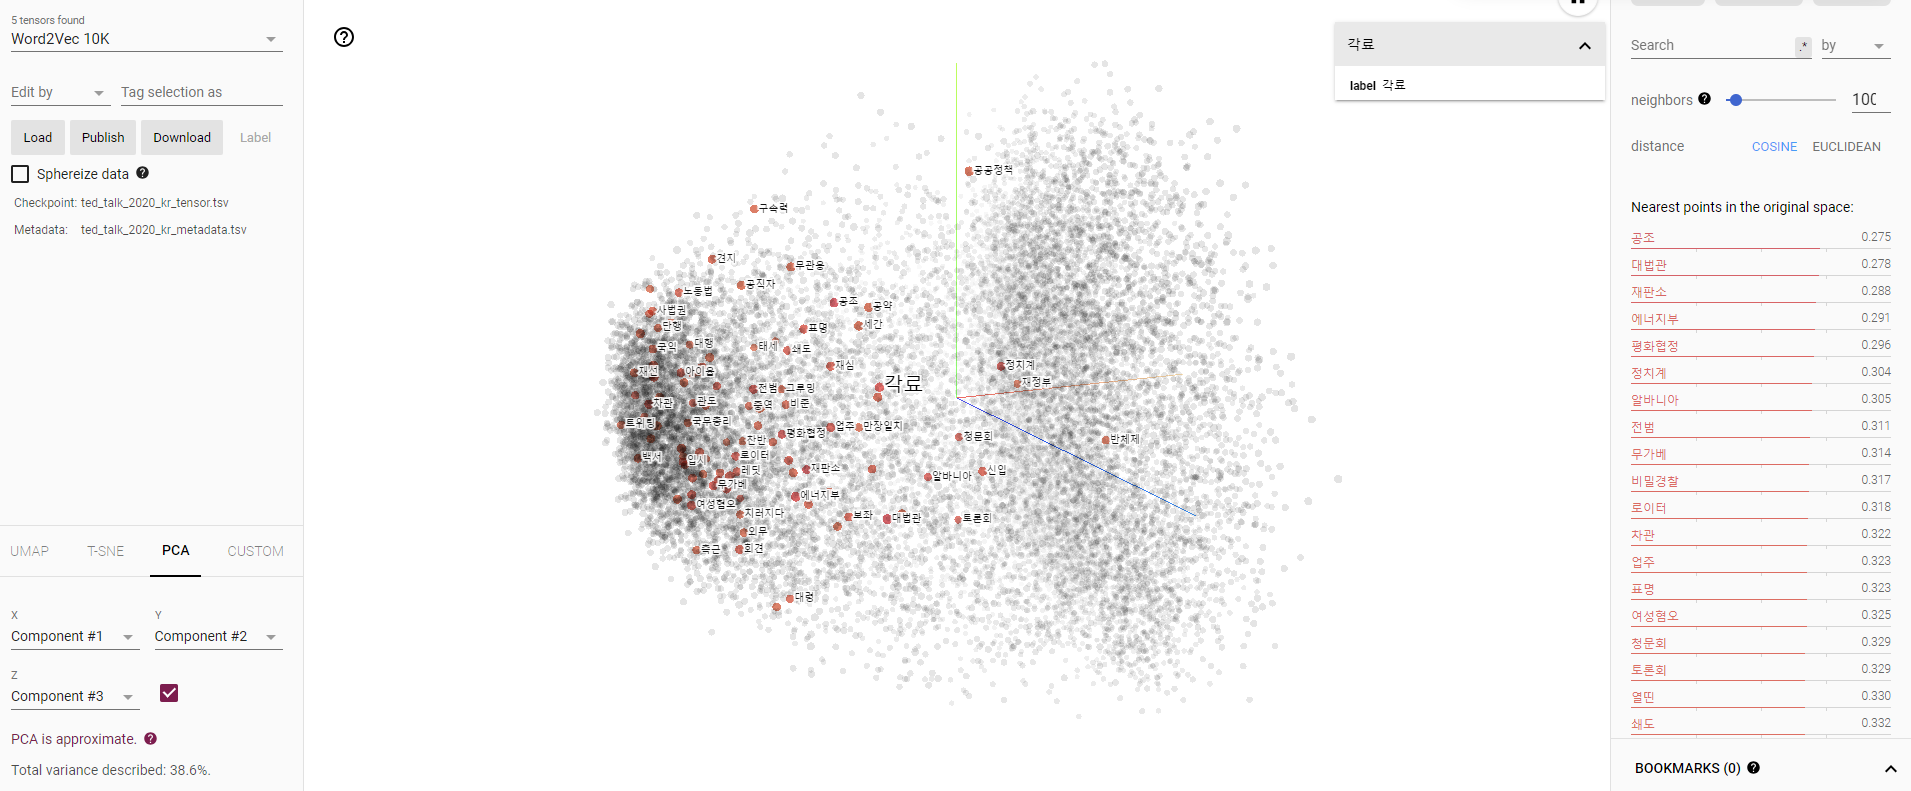

- word2vec 시각화 예시2

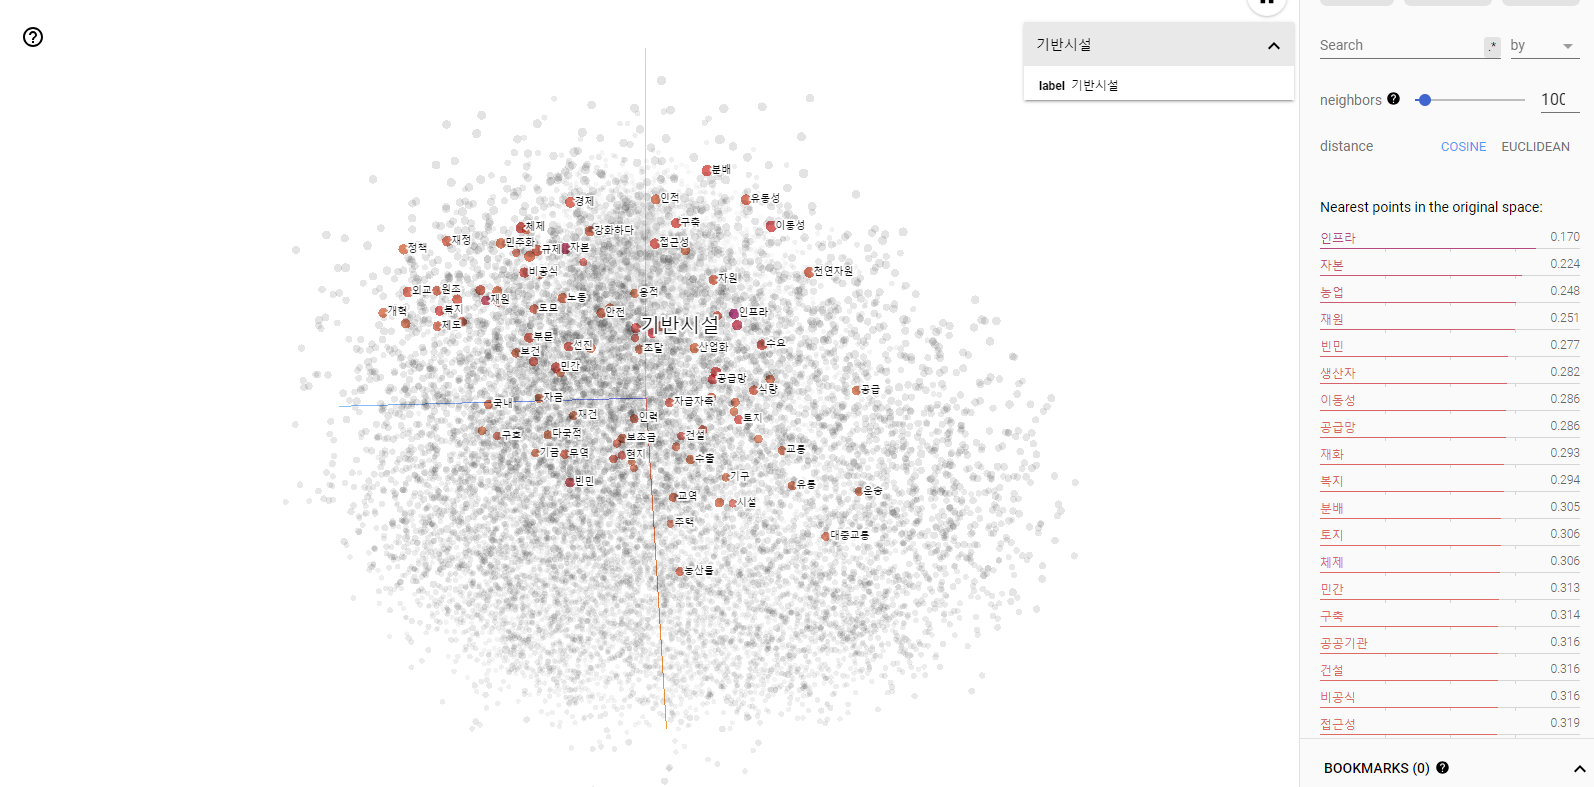